In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hcluster 

In [5]:
pip install kneed

In [7]:
df = pd.read_excel('hepatitis1.xlsx',  na_values="?" )
df = df.replace(to_replace = ['yes','no'],value = ['1','0'])

In [9]:
#Categorical
df['Steroid'].fillna(df.groupby('CLASS')['Steroid'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Fatique'].fillna(df.groupby('CLASS')['Fatique'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Malaise'].fillna(df.groupby('CLASS')['Malaise'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Anorexia'].fillna(df.groupby('CLASS')['Anorexia'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Liver Big'].fillna(df.groupby('CLASS')['Liver Big'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Liver Firm'].fillna(df.groupby('CLASS')['Liver Firm'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Spleen Palpable'].fillna(df.groupby('CLASS')['Spleen Palpable'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Speiders'].fillna(df.groupby('CLASS')['Speiders'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Ascites'].fillna(df.groupby('CLASS')['Ascites'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)
df['Varices'].fillna(df.groupby('CLASS')['Varices'].transform(lambda x: pd.Series.mode(x)[0]), inplace = True)

#Numeric
df["Bilirubin"] = df["Bilirubin"].fillna(df.groupby('CLASS')['Bilirubin'].transform('mean'))
df["Alk Phosphate"] = df["Alk Phosphate"].fillna(df.groupby('CLASS')['Alk Phosphate'].transform('mean'))
df["SGOT"] = df["SGOT"].fillna(df.groupby('CLASS')['SGOT'].transform('mean'))
df["Albumin"] = df["Albumin"].fillna(df.groupby('CLASS')['Albumin'].transform('mean'))
df["Protime"] = df["Protime"].fillna(df.groupby('CLASS')['Protime'].transform('mean'))


In [10]:
#Drop Number & Class
x = df.drop(columns=['#','CLASS'])

scaler = StandardScaler()
#scaler = MinMaxScaler()

x[x.columns] = scaler.fit_transform(x[x.columns])

In [11]:
Sum_of_squared_distances = []
K = range(1,155)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
    print('For n_clusters = ',k ,'The sum of squared distances is :', km.inertia_)

kl = KneeLocator(range(1, 155), Sum_of_squared_distances, curve="convex", direction="decreasing")
print('Optimal k is: ',kl.elbow)


For n_clusters =  1 The sum of squared distances is : 2945.0
For n_clusters =  2 The sum of squared distances is : 2439.58865911656
For n_clusters =  3 The sum of squared distances is : 2232.4547272253594
For n_clusters =  4 The sum of squared distances is : 2097.2823871919695
For n_clusters =  5 The sum of squared distances is : 1993.1230134806442
For n_clusters =  6 The sum of squared distances is : 1919.392273910191
For n_clusters =  7 The sum of squared distances is : 1807.607243181263
For n_clusters =  8 The sum of squared distances is : 1776.4849897707106
For n_clusters =  9 The sum of squared distances is : 1690.5755010055182
For n_clusters =  10 The sum of squared distances is : 1644.2637573646227
For n_clusters =  11 The sum of squared distances is : 1550.762808269193
For n_clusters =  12 The sum of squared distances is : 1513.4172305041855
For n_clusters =  13 The sum of squared distances is : 1476.0213148782627
For n_clusters =  14 The sum of squared distances is : 1438.0764

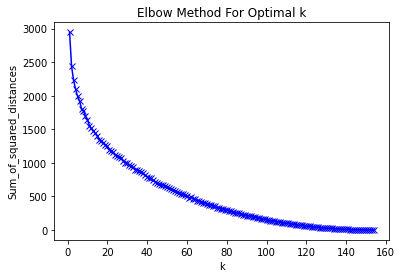

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()